In [1]:
import os
import ROOT
import numpy as np
import h5py
from tqdm import tqdm
import argparse

import math

Welcome to JupyROOT 6.30/02


In [2]:
def calculate_angle(x, y):
    # atan2 함수를 사용하여 각도를 계산
    angle_rad = np.arctan2(y, x)

    # 라디안을 도로 변환
    angle_deg = np.rad2deg(angle_rad)

    return angle_deg




In [3]:

fin = h5py.File("/store/cpnr/users/yewzzang/KNO_mu_500/h5_v2/mu_500MeV_1.h5", 'r', libver='latest', swmr=True)


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(1420,) (1420,)


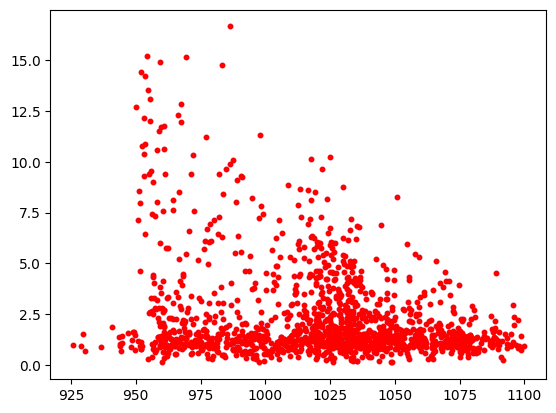

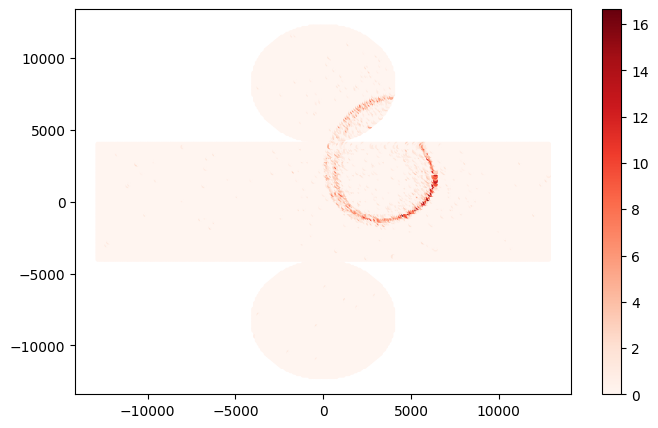

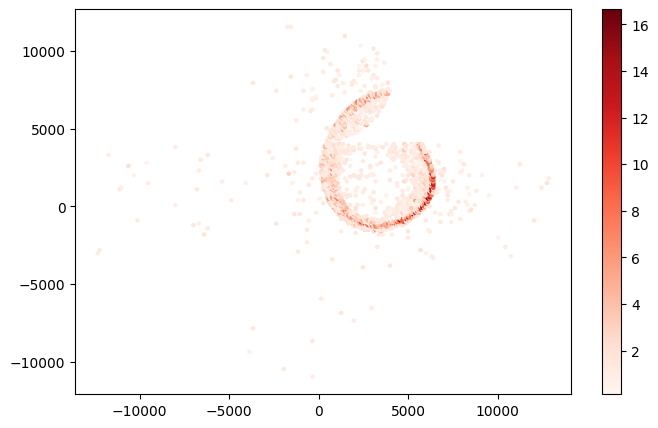

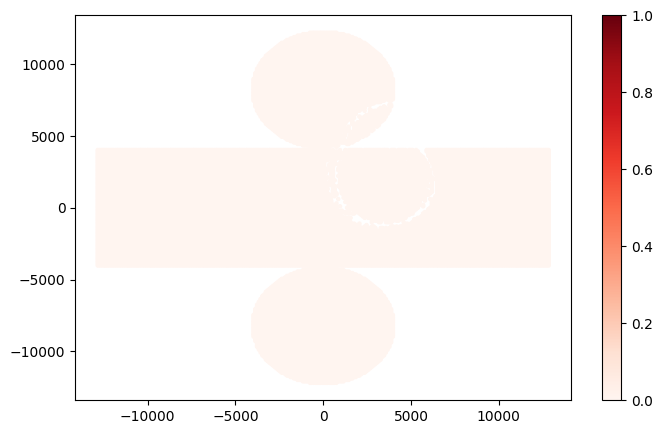

(1139,) (1139,)


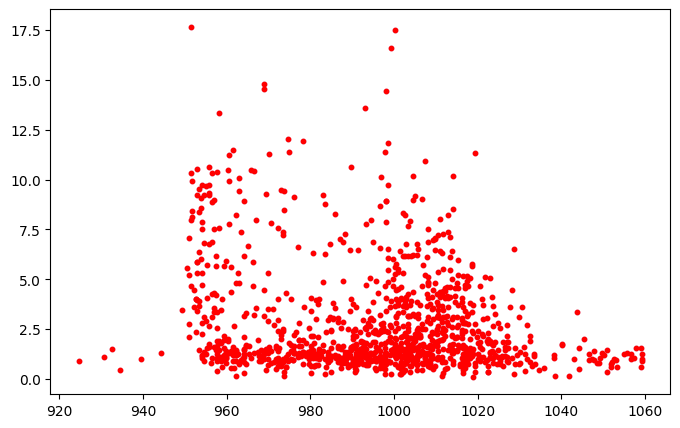

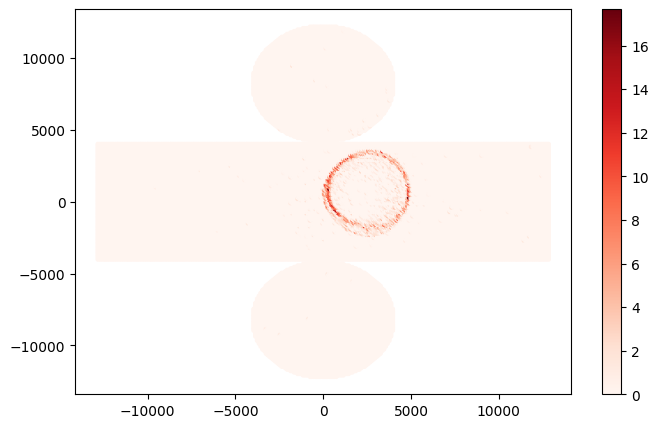

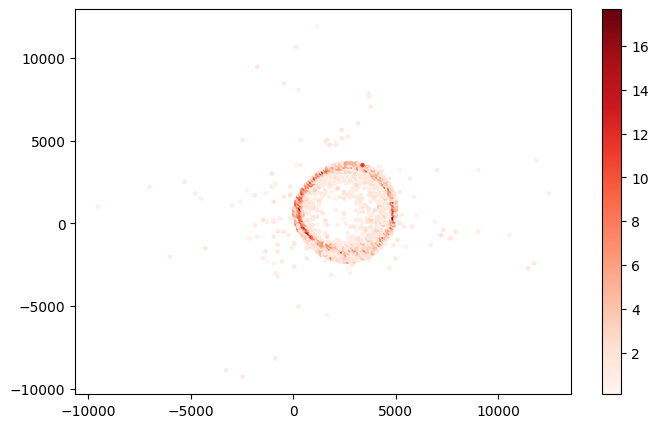

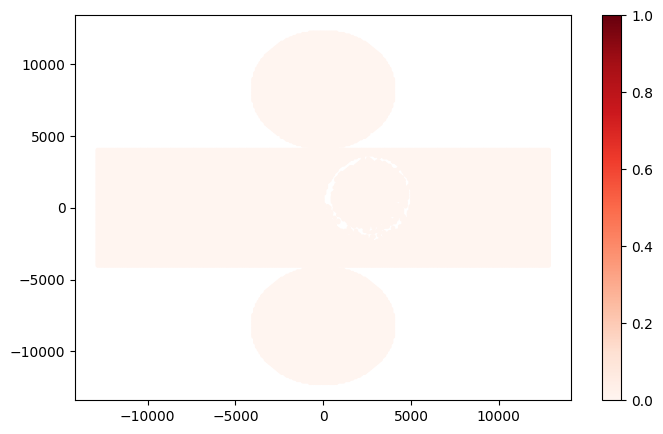

(1981,) (1981,)


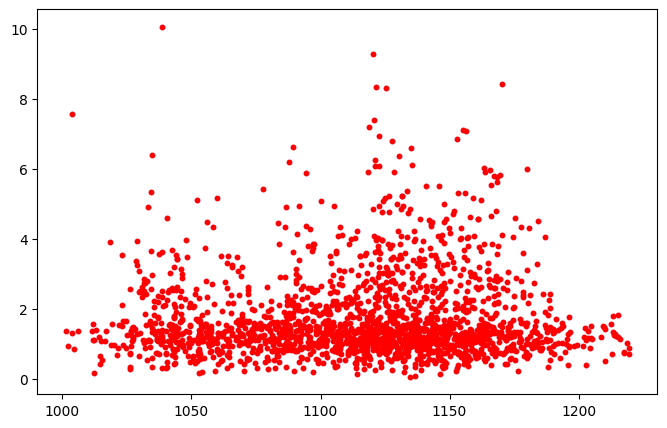

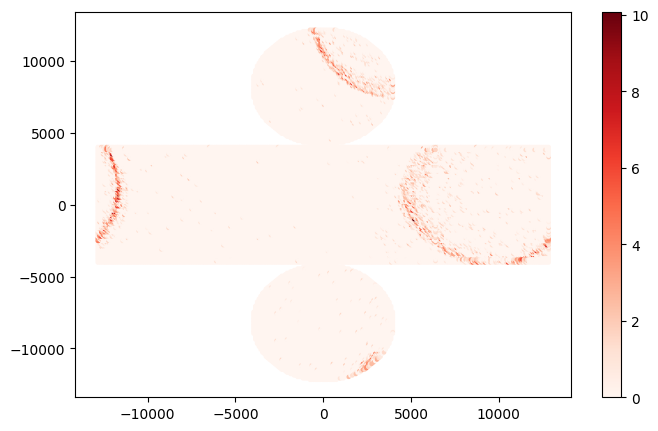

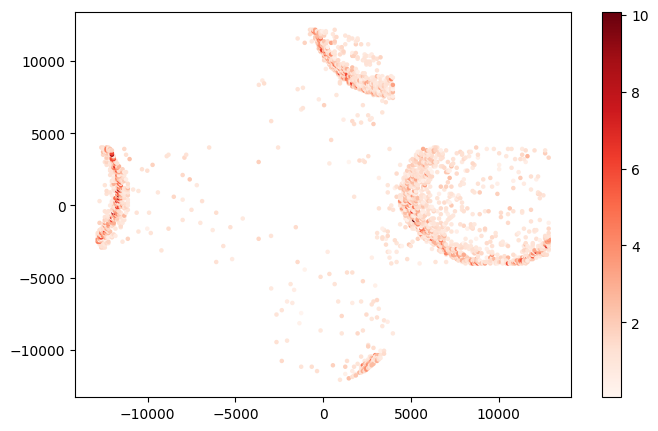

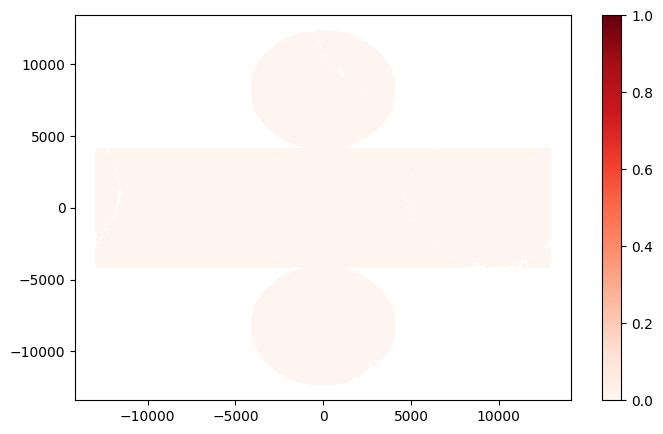

(1990,) (1990,)


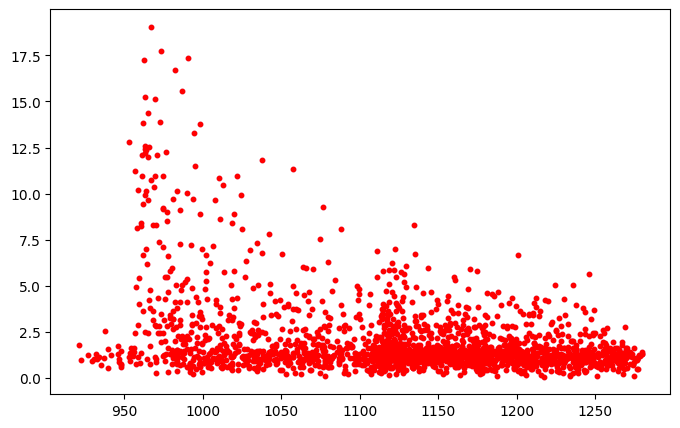

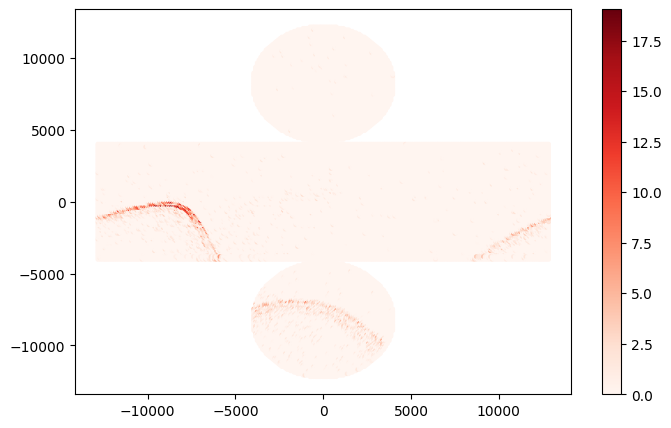

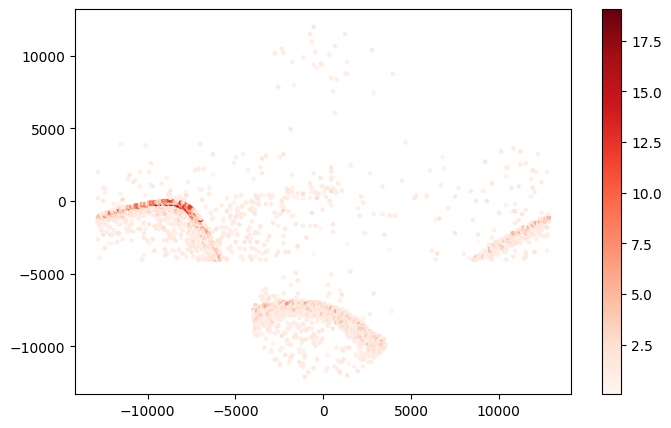

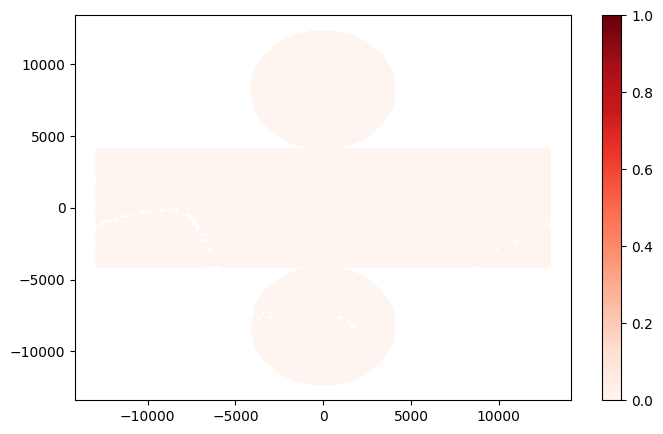

(885,) (885,)


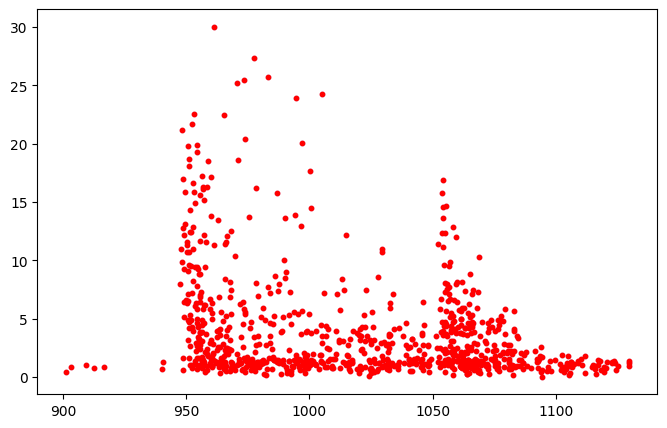

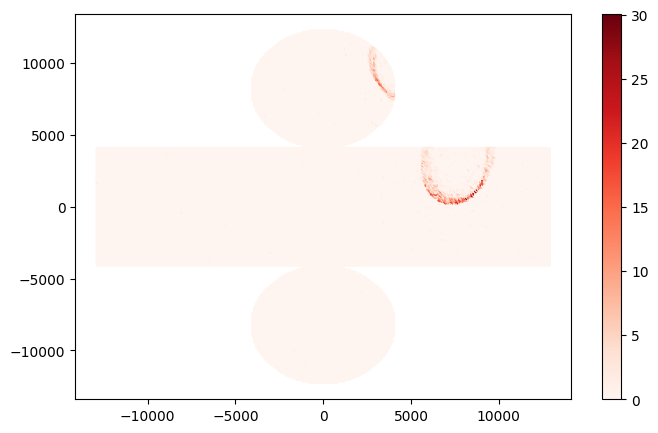

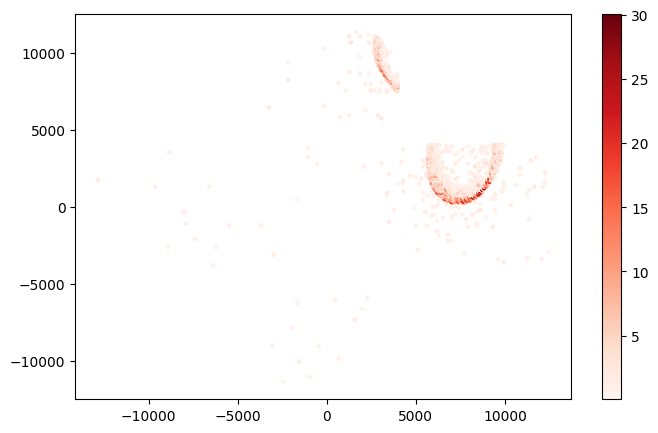

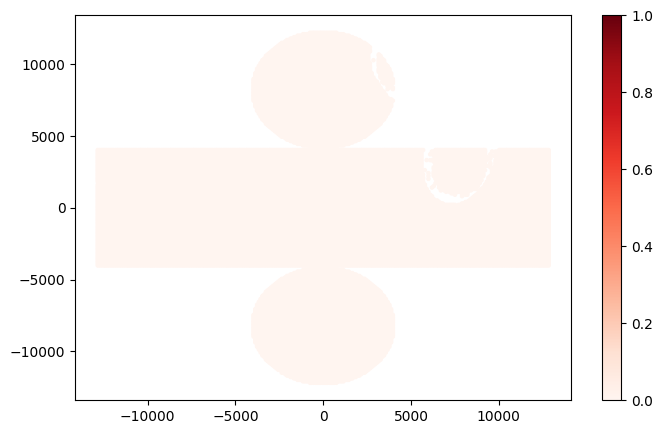

(1515,) (1515,)


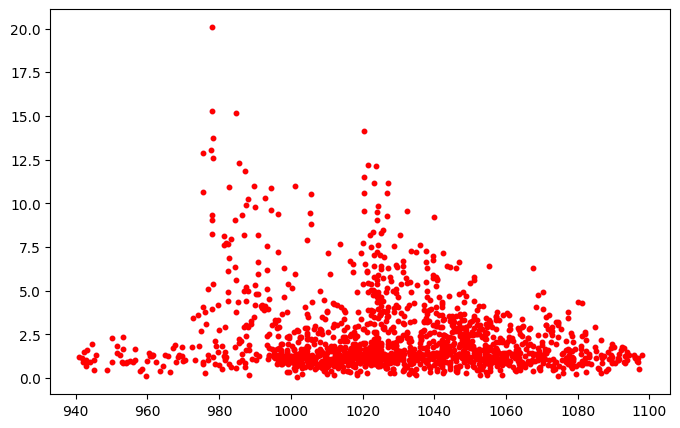

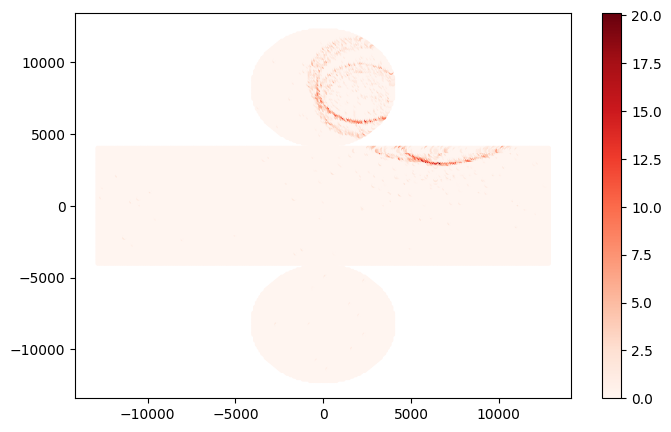

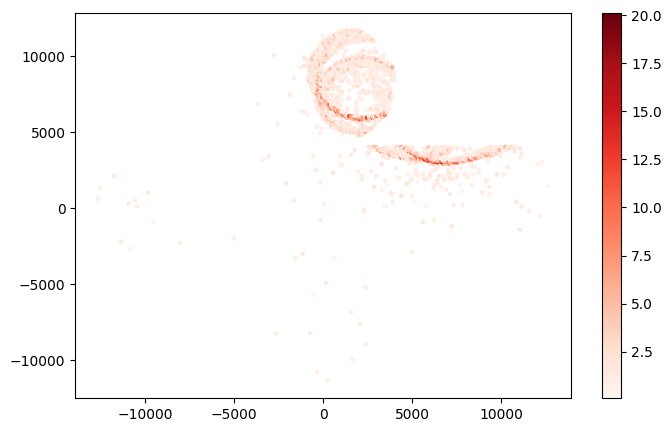

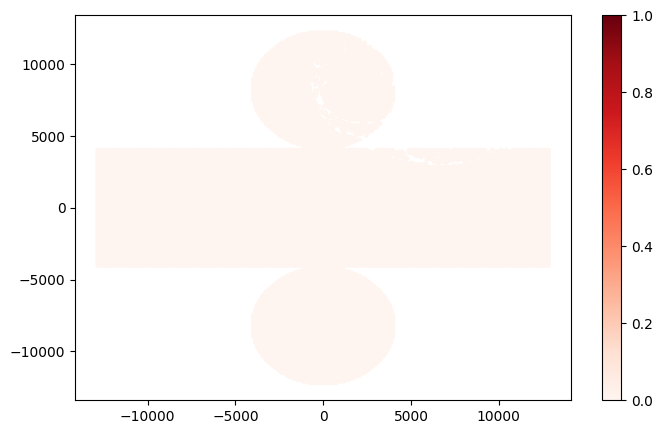

(880,) (880,)


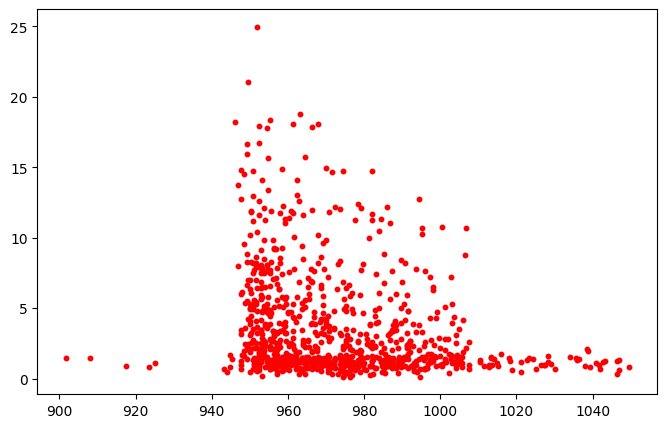

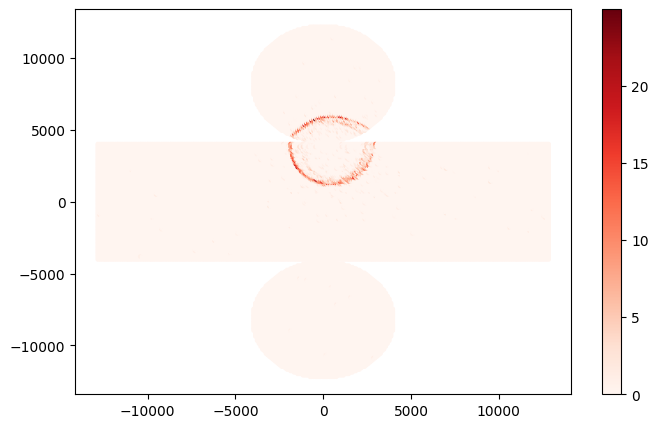

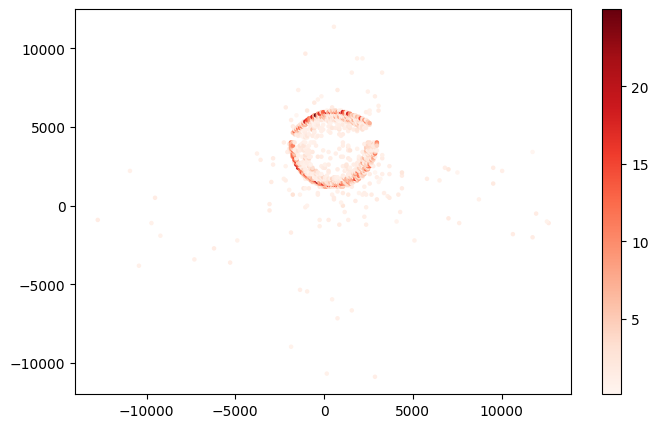

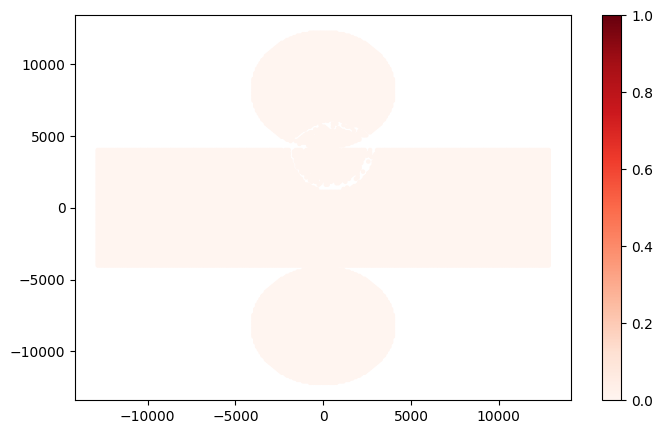

(1370,) (1370,)


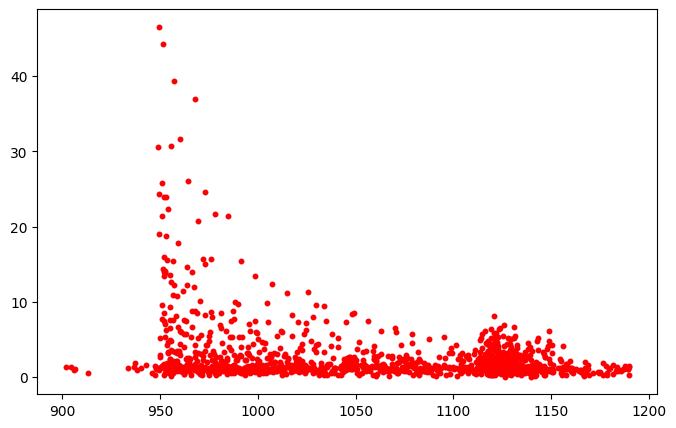

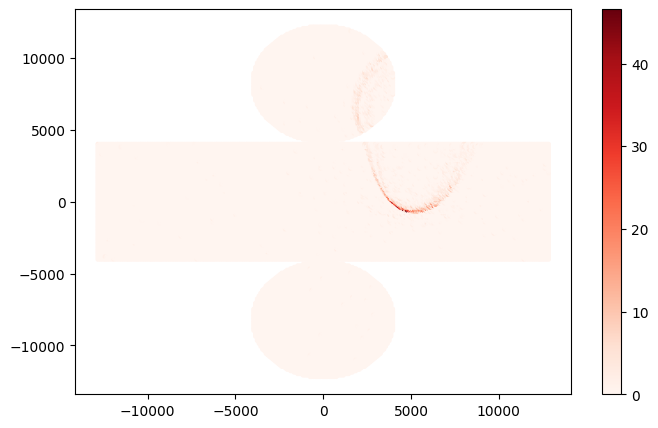

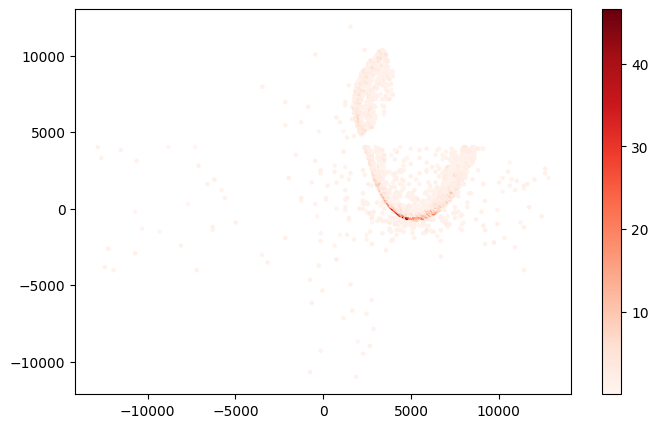

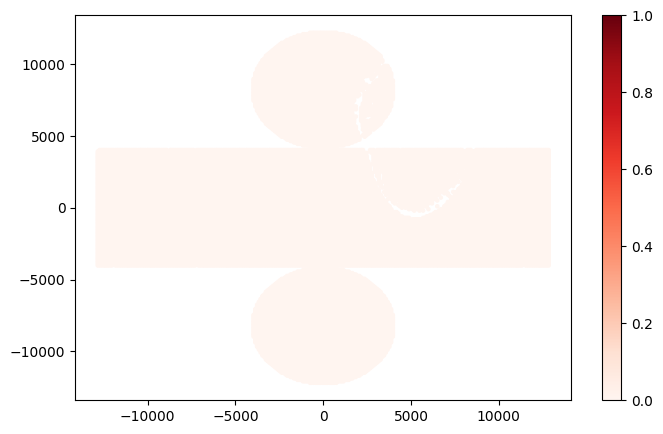

(1499,) (1499,)


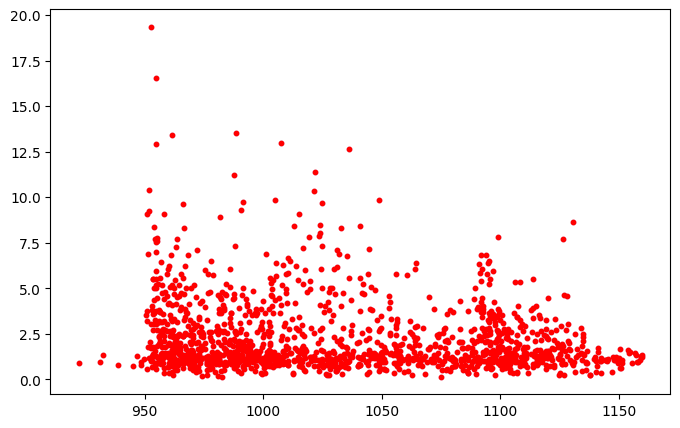

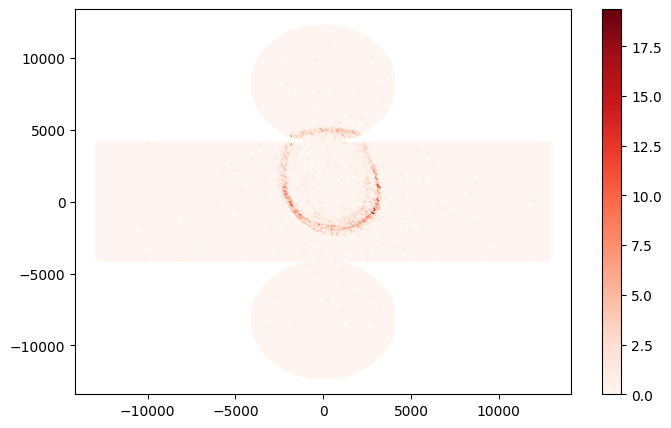

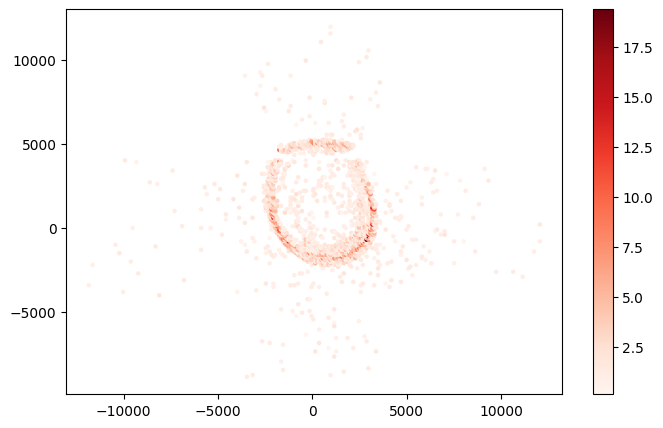

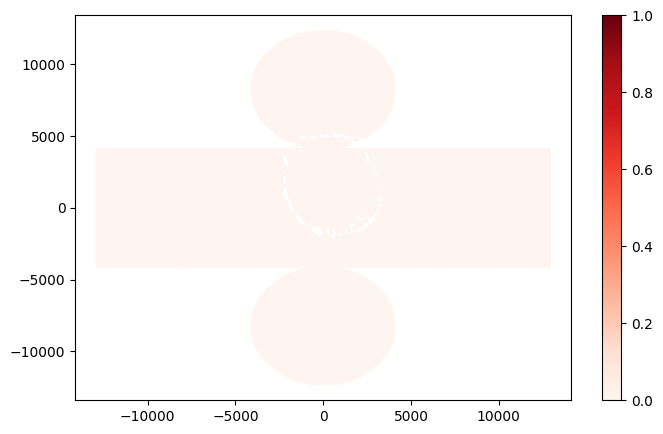

(1600,) (1600,)


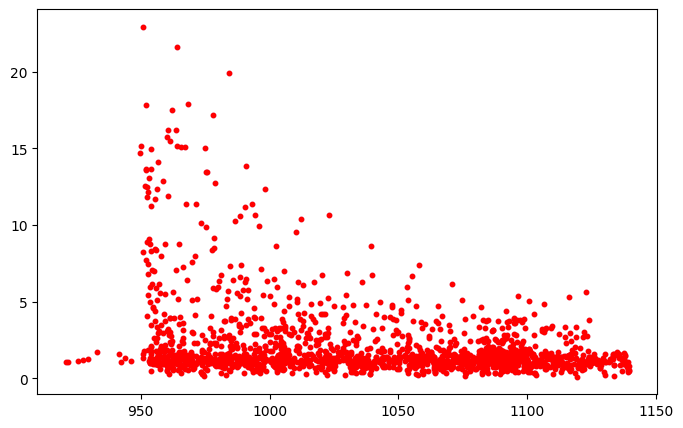

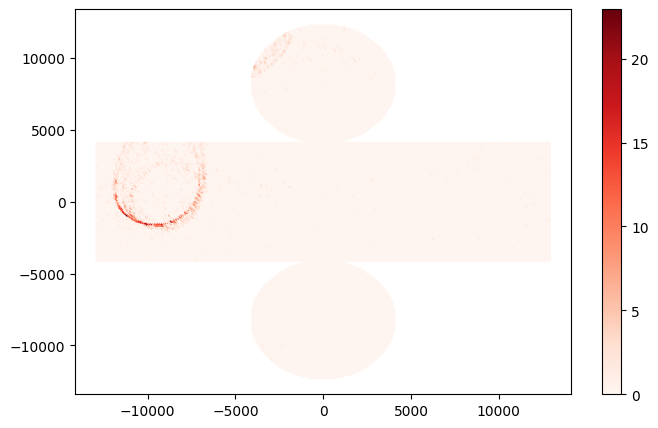

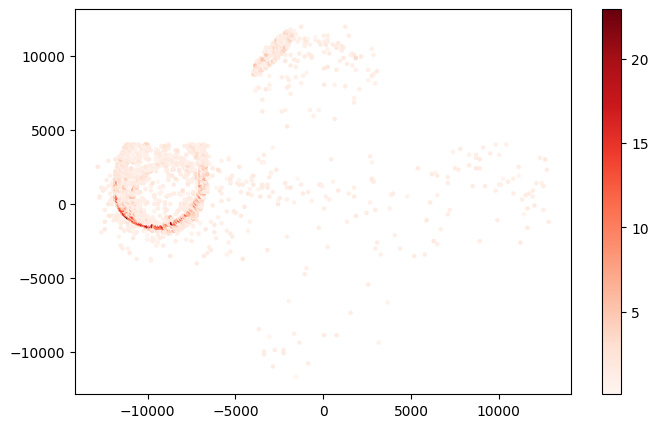

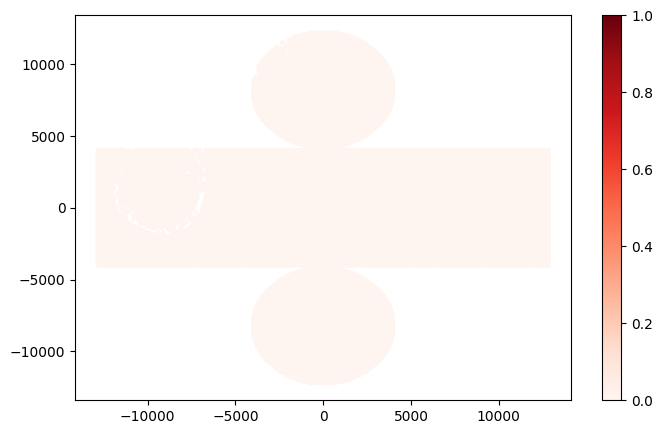

In [5]:
for i in range(10):
    
    cut_charge = 0
    cut_time =0
    cut_time2 = 2000

    plt.scatter(np.array(fin['event']['pmt_t'])[i][np.array(fin['event']['pmt_q'])[i]>0],np.array(fin['event']['pmt_q'])[i][np.array(fin['event']['pmt_q'])[i]>0],color='blue',s = 10,alpha=0.2)
    plt.scatter(np.array(fin['event']['pmt_t'])[i][(np.array(fin['event']['pmt_t'])[i]>cut_time)&(np.array(fin['event']['pmt_t'])[i]<=cut_time2)],np.array(fin['event']['pmt_q'])[i][(np.array(fin['event']['pmt_t'])[i]>cut_time)&(np.array(fin['event']['pmt_t'])[i]<=cut_time2)],color='red',s = 10)
    print(np.array(fin['event']['pmt_q'])[i][(np.array(fin['event']['pmt_t'])[i]>cut_time)&(np.array(fin['event']['pmt_t'])[i]<=cut_time2)].shape,np.array(fin['event']['pmt_q'])[i][np.array(fin['event']['pmt_t'])[i]>0].shape)


    plt.show()

    plt.rcParams['figure.figsize'] = (8, 5) 
    shift = 4106.4609*2*np.pi/4

    side_x1 = 2*np.pi*4106.7739*(calculate_angle(np.array(fin['geom']['pmt_x'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())], np.array(fin['geom']['pmt_y'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())])/360)
    side_z1 = np.array(fin['geom']['pmt_z'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())]


    side_x11 = side_x1[side_x1>shift]-3*shift
    side_z11 = side_z1[side_x1>shift]
    charge_1 = np.array(fin['event']['pmt_q'])[i][(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())][side_x1>shift]
    time_1 = np.array(fin['event']['pmt_t'])[i][(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())][side_x1>shift]


    side_x2 = 2*np.pi*4106.7739*(calculate_angle(np.array(fin['geom']['pmt_x'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())], np.array(fin['geom']['pmt_y'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())])/360)
    side_z2 = np.array(fin['geom']['pmt_z'])[(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())]

    side_x21 = side_x1[side_x2<=shift]+shift
    side_z21 = side_z1[side_x2<=shift]
    charge_2 = np.array(fin['event']['pmt_q'])[i][(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())][side_x2<=shift]
    time_2 = np.array(fin['event']['pmt_t'])[i][(np.array(fin['geom']['pmt_z'])>-np.array(fin['geom']['pmt_z']).max())&(np.array(fin['geom']['pmt_z'])<np.array(fin['geom']['pmt_z']).max())][side_x2<=shift]


    top_x = np.array(fin['geom']['pmt_x'])[np.array(fin['geom']['pmt_z'])>=np.array(fin['geom']['pmt_z']).max()]
    top_z = (np.array(fin['geom']['pmt_z'])[np.array(fin['geom']['pmt_z'])>=np.array(fin['geom']['pmt_z']).max()]+np.array(fin['geom']['pmt_y'])[np.array(fin['geom']['pmt_z'])>=np.array(fin['geom']['pmt_z']).max()]+4106.4609)
    charge_top = np.array(fin['event']['pmt_q'])[i][np.array(fin['geom']['pmt_z'])>=np.array(fin['geom']['pmt_z']).max()]
    time_top = np.array(fin['event']['pmt_t'])[i][np.array(fin['geom']['pmt_z'])>=np.array(fin['geom']['pmt_z']).max()]


    bottom_x = np.array(fin['geom']['pmt_x'])[np.array(fin['geom']['pmt_z'])<=-np.array(fin['geom']['pmt_z']).max()]
    bottom_z = (np.array(fin['geom']['pmt_z'])[np.array(fin['geom']['pmt_z'])<=-np.array(fin['geom']['pmt_z']).max()]+np.array(fin['geom']['pmt_y'])[np.array(fin['geom']['pmt_z'])<=-np.array(fin['geom']['pmt_z']).max()]-4106.4609)
    charge_bottom = np.array(fin['event']['pmt_q'])[i][np.array(fin['geom']['pmt_z'])<=-np.array(fin['geom']['pmt_z']).max()]
    time_bottom = np.array(fin['event']['pmt_t'])[i][np.array(fin['geom']['pmt_z'])<=-np.array(fin['geom']['pmt_z']).max()]

    xxx = np.concatenate([side_x11,side_x21,top_x,bottom_x])
    # zzz = np.concatenate([side_z11,side_z21,top_z,bottom_z])
    zzz = np.concatenate([side_z11,side_z21,top_z,np.abs(bottom_z)-4*4106.4609])
    qqq = np.concatenate([charge_1,charge_2,charge_top,charge_bottom])
    ttt = np.concatenate([time_1,time_2,time_top,time_bottom])


    
    
    plt.scatter(xxx,zzz,s = 5, c= qqq,cmap='Reds')
    plt.colorbar()
    plt.show()
    plt.scatter(xxx[(ttt>cut_time)&(ttt<=cut_time2)],zzz[(ttt>cut_time)&(ttt<=cut_time2)],s = 5, c= qqq[(ttt>cut_time)&(ttt<=cut_time2)],cmap='Reds')
    plt.colorbar()
    plt.show()
    plt.scatter(xxx[(ttt<=cut_time)],zzz[(ttt<=cut_time)],s = 5, c= qqq[(ttt<=cut_time)],cmap='Reds')
    plt.scatter(xxx[(ttt>cut_time2)],zzz[(ttt>cut_time2)],s = 5, c= qqq[(ttt>cut_time2)],cmap='Reds')
    
    plt.colorbar()
    plt.show()
    

In [6]:
# for i in range(10):
    
#     cut_charge = 1.8
#     cut_time = 950
#     cut_time2 = 1300

#     plt.scatter(out_pmt_t[i][out_pmt_q[i]>0],out_pmt_q[i][out_pmt_q[i]>0],color='blue',s = 10,alpha=0.2)
#     plt.scatter(out_pmt_t[i][(out_pmt_q[i]>=cut_charge)&(out_pmt_t[i]>cut_time)&(out_pmt_t[i]<=cut_time2)],out_pmt_q[i][(out_pmt_q[i]>=cut_charge)&(out_pmt_t[i]>cut_time)&(out_pmt_t[i]<=cut_time2)],color='red',s = 10)
#     print(out_pmt_q[i][(out_pmt_q[i]>=cut_charge)&(out_pmt_t[i]>cut_time)&(out_pmt_t[i]<=cut_time2)].shape,out_pmt_q[i][out_pmt_t[i]>0].shape)


#     plt.show()

#     plt.rcParams['figure.figsize'] = (8, 5) 
#     shift = 4106.4609*2*np.pi/4

#     side_x1 = 2*np.pi*4106.7739*(calculate_angle(out_pmt_x[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())], out_pmt_y[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())])/360)
#     side_z1 = out_pmt_z[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())]


#     side_x11 = side_x1[side_x1>shift]-3*shift
#     side_z11 = side_z1[side_x1>shift]
#     charge_1 = out_pmt_q[i][(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())][side_x1>shift]
#     time_1 = out_pmt_t[i][(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())][side_x1>shift]


#     side_x2 = 2*np.pi*4106.7739*(calculate_angle(out_pmt_x[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())], out_pmt_y[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())])/360)
#     side_z2 = out_pmt_z[(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())]

#     side_x21 = side_x1[side_x2<=shift]+shift
#     side_z21 = side_z1[side_x2<=shift]
#     charge_2 = out_pmt_q[i][(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())][side_x2<=shift]
#     time_2 = out_pmt_t[i][(out_pmt_z>-out_pmt_z.max())&(out_pmt_z<out_pmt_z.max())][side_x2<=shift]


#     top_x = out_pmt_x[out_pmt_z>=out_pmt_z.max()]
#     top_z = (out_pmt_z[out_pmt_z>=out_pmt_z.max()]+out_pmt_y[out_pmt_z>=out_pmt_z.max()]+4106.4609)
#     charge_top = out_pmt_q[i][out_pmt_z>=out_pmt_z.max()]
#     time_top = out_pmt_t[i][out_pmt_z>=out_pmt_z.max()]


#     bottom_x = out_pmt_x[out_pmt_z<=-out_pmt_z.max()]
#     bottom_z = (out_pmt_z[out_pmt_z<=-out_pmt_z.max()]+out_pmt_y[out_pmt_z<=-out_pmt_z.max()]-4106.4609)
#     charge_bottom = out_pmt_q[i][out_pmt_z<=-out_pmt_z.max()]
#     time_bottom = out_pmt_t[i][out_pmt_z<=-out_pmt_z.max()]

#     xxx = np.concatenate([side_x11,side_x21,top_x,bottom_x])
#     zzz = np.concatenate([side_z11,side_z21,top_z,bottom_z])
#     # zzz = np.concatenate([side_z11,side_z21,top_z,np.abs(bottom_z)-4*4106.4609])
#     qqq = np.concatenate([charge_1,charge_2,charge_top,charge_bottom])
#     ttt = np.concatenate([time_1,time_2,time_top,time_bottom])


    
    
#     plt.scatter(xxx,zzz,s = 5, c= qqq,cmap='Reds')
#     plt.colorbar()
#     plt.show()
#     plt.scatter(xxx[(qqq>=cut_charge)&(ttt>cut_time)&(ttt<=cut_time2)],zzz[(qqq>=cut_charge)&(ttt>cut_time)&(ttt<=cut_time2)],s = 5, c= qqq[(qqq>=cut_charge)&(ttt>cut_time)&(ttt<=cut_time2)],cmap='Reds')
#     plt.colorbar()
#     plt.show()
#     plt.scatter(xxx[(qqq<cut_charge)&(ttt<=cut_time)],zzz[(qqq<cut_charge)&(ttt<=cut_time)],s = 5, c= qqq[(qqq<cut_charge)&(ttt<=cut_time)],cmap='Reds')
#     plt.scatter(xxx[(qqq<cut_charge)&(ttt>cut_time2)],zzz[(qqq<cut_charge)&(ttt>cut_time2)],s = 5, c= qqq[(qqq<cut_charge)&(ttt>cut_time2)],cmap='Reds')
    
#     plt.colorbar()
#     plt.show()
    